## London Ambulance and Knife Crime

There may be differneces between when a knife crime is reported to police and whern victims of stabbing need to be treated. 

- Do ambulance call-outs correlate with knife crime locations and times? 

- Do we see the same trend in demand ( sesonal, meteorological, and temporal ) ofr ambulances an ploce?


In [1]:
import geopandas as gdp

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
instance1 = pd.read_csv('./data/Incidents/incidentsQ1.csv')

In [4]:
instance1.head()


,incidentid,callstart,age,sex,lat_incident,lon_incident,borough,ccgname,ccgcluster,lsoa,...,alcoholrelated,hospitalcode,conveyed,conveyed_ed,cntd__incidenttype,min__incidenttype,max__incidenttype,cntd__illnesstype,min__illnesstype,max__illnesstype
0,20171230000001,2017-12-30 00:00:07.000,15.0,F,51.540,0.010,Newham,NHS Newham CCG,North East,E01003559,...,0,585,1,1,1,Illness (known),Illness (known),1,Allergic reaction/rash,Allergic reaction/rash
1,20171230000004,2017-12-30 00:01:38.000,45.0,M,51.555,-0.005,Waltham Forest,NHS Waltham Forest CCG,North East,E01004338,...,0,0,0,0,0,NaN,NaN,0,NaN,NaN
2,20171230000005,2017-12-30 00:01:47.000,25.0,F,51.545,0.040,Newham,NHS Newham CCG,North East,E01003588,...,0,585,1,1,1,Illness (unknown),Illness (unknown),2,Pyrexia of unknown origin,Sepsis
3,20171230000006,2017-12-29 23:59:48.000,75.0,F,51.370,-0.210,Sutton,NHS Sutton CCG,South West,E01004130,...,0,533,1,1,1,Illness (unknown),Illness (unknown),2,Gastrointestinal,Sepsis
4,20171230000007,2017-12-30 00:01:56.000,85.0,M,51.520,-0.365,Ealing,NHS Ealing CCG,North West,E01001217,...,0,9500,0,0,1,Illness (known),Illness (known),1,Diabetic,Diabetic


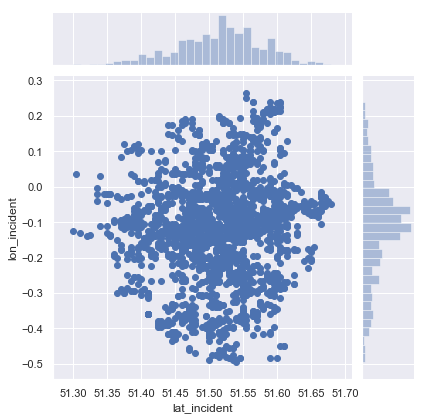

In [138]:
sns.jointplot(ins['lat_incident'],ins['lon_incident'])

In [5]:
responce1 = pd.read_csv('./data/Responses/responsesP1(Jan-Feb).csv')

In [6]:
#responce1.head()

In [8]:
ins = pd.read_csv('./data/incidenttot_stab.csv')

In [10]:
ins.head(1)

,Unnamed: 0,incidentid,callstart,age,sex,lat_incident,lon_incident,borough,ccgname,ccgcluster,...,hospitalcode,conveyed,conveyed_ed,cntd__incidenttype,min__incidenttype,max__incidenttype,cntd__illnesstype,min__illnesstype,max__illnesstype,Quarter
0,0,20171230001042,2017-12-30 06:47:37.000,25.0,M,51.515,-0.24,Hammersmith and Fulham,NHS Hammersmith and Fulham CCG,North West,...,1523,1,0,2,Accident,Assault,2,Laceration/incision - major,Laceration/incision (superficial),Q1


In [89]:
import dateutil.parser
def calHrs(time):
    a = dateutil.parser.parse(time)
    return int(a.strftime("%H"))
def calWeek(time):
    a = dateutil.parser.parse(time)
    return str(a.strftime("%a"))
def calWeekD(time):
    a = dateutil.parser.parse(time)
    return int(a.strftime("%u"))
def calMon(time):
    a = dateutil.parser.parse(time)
    return int(a.strftime("%m"))
def calYear(time):
    a = dateutil.parser.parse(time)
    return int(a.strftime("%G"))

In [12]:
print(ins['callstart'][1])
a = dateutil.parser.parse(ins['callstart'][1])
print(a.strftime("%a"))

2017-12-30 10:48:02.000
Sat


In [220]:
ins['Hrs'] = ins.apply(lambda x: calHrs(x['callstart']), axis=1)
ins['Week'] = ins.apply(lambda x: calWeek(x['callstart']), axis=1)
ins['Mon'] = ins.apply(lambda x: calMon(x['callstart']), axis=1)
ins['Year'] = ins.apply(lambda x: calYear(x['callstart']), axis=1)
ins[' '] = ins.apply(lambda x: calWeekD(x['callstart']), axis=1)

In [223]:
ins.head()

,Unnamed: 0,incidentid,callstart,age,sex,lat_incident,lon_incident,borough,ccgname,ccgcluster,...,max__incidenttype,cntd__illnesstype,min__illnesstype,max__illnesstype,Quarter,Hrs,Week,Mon,Year,WeekD
0,0,20171230001042,2017-12-30 06:47:37.000,25.0,M,51.515,-0.240,Hammersmith and Fulham,NHS Hammersmith and Fulham CCG,North West,...,Assault,2,Laceration/incision - major,Laceration/incision (superficial),Q1,6,Sat,12,2017,6
1,1,20171230001859,2017-12-30 10:48:02.000,60.0,M,51.325,-0.135,Croydon,NHS Croydon CCG,South West,...,Illness (unknown),1,Other medical conditions,Other medical conditions,Q1,10,Sat,12,2017,6
2,2,20171230003316,2017-12-30 15:20:23.000,45.0,M,51.610,-0.070,Enfield,NHS Enfield CCG,North Central,...,Self-harm,3,Laceration/incision (superficial),Stab/shot/weapon wound,Q1,15,Sat,12,2017,6
3,3,20171230003783,2017-12-30 16:52:33.000,20.0,F,51.540,-0.010,Newham,NHS Newham CCG,North East,...,Illness (known),1,Laceration/incision (superficial),Laceration/incision (superficial),Q1,16,Sat,12,2017,6
4,4,20171230004441,2017-12-30 18:50:55.000,20.0,M,51.550,-0.310,Brent,NHS Brent CCG,North West,...,Assault,1,Stab/shot/weapon wound,Stab/shot/weapon wound,Q1,18,Sat,12,2017,6


In [31]:
ins.columns

Index(['Unnamed: 0', 'incidentid', 'callstart', 'age', 'sex', 'lat_incident',
       'lon_incident', 'borough', 'ccgname', 'ccgcluster', 'lsoa', 'wardname',
       'wardID', 'callconcluded', 'T0_T5CallConnectToCallConcluded', 'mps',
       'ht', 'dohcategory', 'chiefcomplaintcode', 'chiefcomplaint',
       'ampdscode', 'description', 'arrivedatscene_aqi', 'response_aqi',
       'vehiclesarrived', 'totalonscenetime', 'totaljobcycletime',
       'alcoholrelated', 'hospitalcode', 'conveyed', 'conveyed_ed',
       'cntd__incidenttype', 'min__incidenttype', 'max__incidenttype',
       'cntd__illnesstype', 'min__illnesstype', 'max__illnesstype', 'Quarter',
       'Hrs', 'Week', 'Mon', 'Year'],
      dtype='object')

In [50]:
#ins.chiefcomplai
int(ins.callstart[1][:4]) == 2018
#ins.to_csv('instance_date.csv')

False

In [59]:
ins2018 = ins[ins['Year'] == 2018]
#ins2018

,Unnamed: 0,incidentid,callstart,age,sex,lat_incident,lon_incident,borough,ccgname,ccgcluster,...,min__incidenttype,max__incidenttype,cntd__illnesstype,min__illnesstype,max__illnesstype,Quarter,Hrs,Week,Mon,Year
16,16,20180101000040,2018-01-01 00:10:47.000,25.0,M,51.530,-0.200,Brent,NHS Brent CCG,North West,...,Assault,Assault,1,Stab/shot/weapon wound,Stab/shot/weapon wound,Q1,0,Mon,1,2018
17,17,20180101000390,2018-01-01 01:09:30.000,30.0,M,51.590,0.020,Redbridge,NHS Redbridge CCG,North East,...,Assault,Assault,2,Laceration/incision (superficial),Minor injuries (other),Q1,1,Mon,1,2018
18,18,20180101000667,2018-01-01 01:59:32.000,40.0,M,51.560,-0.060,Hackney,NHS City and Hackney CCG,North East,...,Assault,Assault,1,Stab/shot/weapon wound,Stab/shot/weapon wound,Q1,1,Mon,1,2018
19,19,20180101000846,2018-01-01 02:24:30.000,35.0,M,51.460,-0.175,Wandsworth,NHS Wandsworth CCG,South West,...,Illness (known),Illness (known),1,Stab/shot/weapon wound,Stab/shot/weapon wound,Q1,2,Mon,1,2018
20,20,20180101000895,2018-01-01 02:34:19.000,25.0,M,51.525,-0.095,Islington,NHS Islington CCG,North Central,...,Assault,Illness (known),2,Cardiac arrest,Stab/shot/weapon wound,Q1,2,Mon,1,2018
21,21,20180101001067,2018-01-01 02:59:43.000,50.0,M,51.585,-0.115,Haringey,NHS Haringey CCG,North Central,...,Assault,Assault,3,Head Injury – Minor,Minor cuts & bruising,Q1,2,Mon,1,2018
22,22,20180101001307,2018-01-01 03:40:29.000,20.0,M,51.565,0.240,Havering,NHS Havering CCG,North East,...,Illness (known),Police incident,2,Fracture/possible fracture,Stab/shot/weapon wound,Q1,3,Mon,1,2018
23,23,20180101001312,2018-01-01 03:40:56.000,30.0,M,51.565,0.240,Havering,NHS Havering CCG,North East,...,Police incident,Police incident,1,Stab/shot/weapon wound,Stab/shot/weapon wound,Q1,3,Mon,1,2018
24,24,20180101001401,2018-01-01 03:54:44.000,40.0,F,51.580,-0.020,Waltham Forest,NHS Waltham Forest CCG,North East,...,Illness (known),Illness (known),1,Laceration/incision (superficial),Laceration/incision (superficial),Q1,3,Mon,1,2018
25,25,20180101001442,2018-01-01 03:59:34.000,35.0,M,51.480,-0.470,Hillingdon,NHS Hillingdon CCG,North West,...,Assault,Assault,1,Stab/shot/weapon wound,Stab/shot/weapon wound,Q1,3,Mon,1,2018


In [222]:
ins2018.to_csv('instance_date_2018_2.csv')

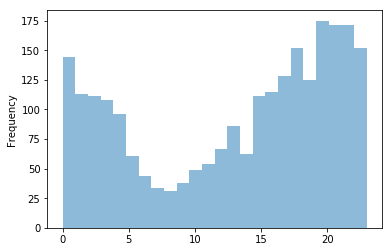

In [39]:
ins['Hrs'].plot.hist(bins=24, alpha=0.5)
plt.show()

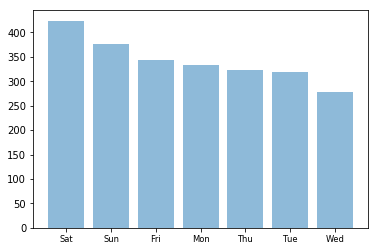

In [43]:
week = ins['Week'].value_counts()
plt.bar(range(len(week)), week.values, alpha = 0.5)
plt.xticks(range(len(week)), week.index.values, size='small')
plt.show()

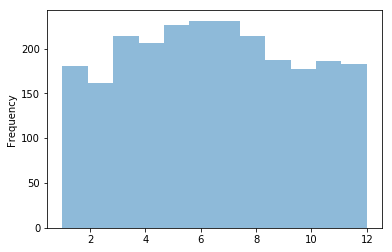

In [40]:
ins['Mon'].plot.hist(bins=12, alpha=0.5)
plt.show()

In [18]:
ins['Year'].value_counts()

2018    2352
2019      30
2017      16
Name: Year, dtype: int64

In [63]:
k_crime = pd.read_excel('./data/Knife crime data/Daily_ward_level_London_knifecrime_2018.xlsx',sheetname = 'Knife crime data 2018')

/anaconda2/envs/gsa2018/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [91]:
k_crime['Mon'] = k_crime.apply(lambda x: int(x['Date - Daily Data'].strftime("%m")), axis=1)
k_crime['Week'] = k_crime.apply(lambda x: str(x['Date - Daily Data'].strftime("%a")), axis=1)
k_crime['Week_d'] = k_crime.apply(lambda x: int(x['Date - Daily Data'].strftime("%u")), axis=1)

,Ward Code,Ward Name,Borough Code,Borough Name,Date - Daily Data,Knife Crime Offs,Knife Crime With Injury Offs,Knife Crime with Injury Pers Robb Offs,Knife Crime Injury Victims 1-24,Knife Crime Injury Victims Not DA 1-24 Gang Flagged,Knife Crime Injury Victims Not DA 1-24,Gun Crime Lethal Barrelled Discharged Offs,Month,Week,Week_d,Mon
0,E05000026,Abbey,KG,Barking and Dagenham,2018-01-01,0,0,0,0,0,0,0,1,Mon,1,1


In [ ]:
k_crime_0 = k_crime[(k_crime.iloc[:,5] != 0 )| (k_crime.iloc[:,6] != 0) |( k_crime.iloc[:,7] != 0) |( k_crime.iloc[:,8] != 0) | (k_crime.iloc[:,9] != 0) | (k_crime.iloc[:,10] != 0) | (k_crime.iloc[:,11] != 0) ]


In [225]:
k_crime.head(50)

,Ward Code,Ward Name,Borough Code,Borough Name,Date - Daily Data,Knife Crime Offs,Knife Crime With Injury Offs,Knife Crime with Injury Pers Robb Offs,Knife Crime Injury Victims 1-24,Knife Crime Injury Victims Not DA 1-24 Gang Flagged,Knife Crime Injury Victims Not DA 1-24,Gun Crime Lethal Barrelled Discharged Offs,Month,Week,Week_d,Mon
0,E05000026,Abbey,KG,Barking and Dagenham,2018-01-01,0,0,0,0,0,0,0,1,Mon,1,1
1,E05000026,Abbey,KG,Barking and Dagenham,2018-01-02,1,0,0,0,0,0,0,1,Tue,2,1
2,E05000026,Abbey,KG,Barking and Dagenham,2018-01-03,0,0,0,0,0,0,0,1,Wed,3,1
3,E05000026,Abbey,KG,Barking and Dagenham,2018-01-04,0,0,0,0,0,0,0,1,Thu,4,1
4,E05000026,Abbey,KG,Barking and Dagenham,2018-01-05,0,0,0,0,0,0,0,1,Fri,5,1
5,E05000026,Abbey,KG,Barking and Dagenham,2018-01-06,0,0,0,0,0,0,0,1,Sat,6,1
6,E05000026,Abbey,KG,Barking and Dagenham,2018-01-07,0,0,0,0,0,0,0,1,Sun,7,1
7,E05000026,Abbey,KG,Barking and Dagenham,2018-01-08,0,0,0,0,0,0,0,1,Mon,1,1
8,E05000026,Abbey,KG,Barking and Dagenham,2018-01-09,0,0,0,0,0,0,0,1,Tue,2,1
9,E05000026,Abbey,KG,Barking and Dagenham,2018-01-10,0,0,0,0,0,0,0,1,Wed,3,1


In [ ]:
k_crime_0['sum'] = (k_crime.iloc[:,5]) + (k_crime.iloc[:,6]) + ( k_crime.iloc[:,7]) + ( k_crime.iloc[:,8] ) + (k_crime.iloc[:,9] ) + (k_crime.iloc[:,10] ) + (k_crime.iloc[:,11])

12


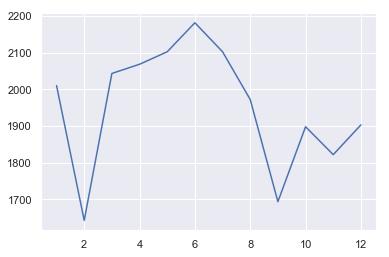

In [157]:
month = []
month_count = []
for i in range(1,13):
    month.append(i)
    month_count.append(sum((k_crime_0[k_crime_0['Mon']==i])['sum']))
print(len(month_count))
plt.plot(month, month_count)

7


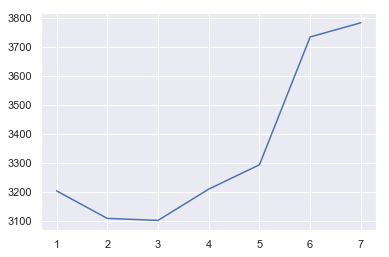

In [159]:
month = []
month_count = []
for i in range(1,8):
    month.append(i)
    month_count.append(sum((k_crime_0[k_crime_0['Week_d']==i])['sum']))
print(len(month_count))
plt.plot(month, month_count)

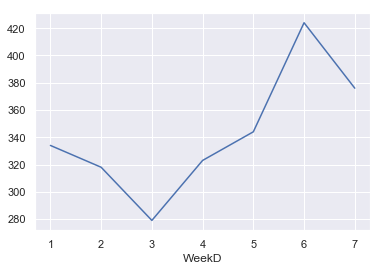

In [224]:
ins.groupby('WeekD')['incidentid'].count().plot()

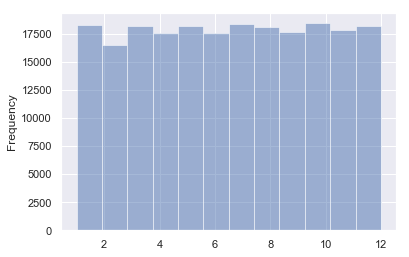

In [95]:
sns.set()
k_crime['Mon'].plot.hist(bins=12, alpha=0.5)
plt.show()

In [109]:
k_crime['Mon'].describe()

count    214587.000000
mean          6.533280
std           3.449051
min           1.000000
25%           4.000000
50%           7.000000
75%          10.000000
max          12.000000
Name: Mon, dtype: float64

In [121]:
#k_crime.iloc[:,12]

In [126]:
#k_crime_0

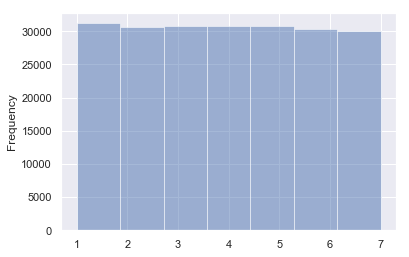

In [96]:
sns.set()
k_crime['Week_d'].plot.hist(bins=7, alpha=0.5)
plt.show()

In [101]:
import os
import geopandas as gpd
ward = gpd.read_file(os.path.join('data','London-wards-2014','London-wards-2014_ESRI','London_Ward_CityMerged.shp'))

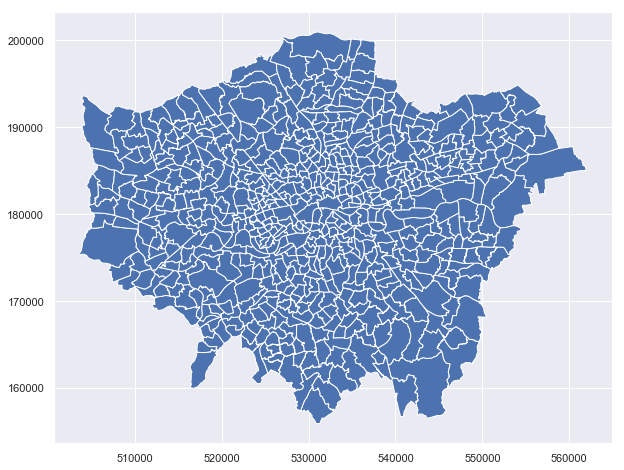

In [106]:
f, ax = plt.subplots(figsize = (10,10))
ward.plot(ax =ax)
plt.show()

In [166]:
k_crime.columns

Index(['Ward Code', 'Ward Name', 'Borough Code', 'Borough Name',
       'Date - Daily Data', 'Knife Crime Offs', 'Knife Crime With Injury Offs',
       'Knife Crime with Injury Pers Robb Offs',
       'Knife Crime Injury Victims 1-24',
       'Knife Crime Injury Victims Not DA 1-24 Gang Flagged',
       'Knife Crime Injury Victims Not DA 1-24',
       'Gun Crime Lethal Barrelled Discharged Offs', 'Month', 'Week', 'Week_d',
       'Mon'],
      dtype='object')

In [183]:
crime5 = k_crime.iloc[:10,:]
crime5.columns = ['Ward Code', 'Ward Name', 'Borough Code', 'Borough Name',
       'Date - Daily Data', 'a', 'b',
       'c',
       'd',
       'e',
       'f',
       'g', 'Month', 'Week', 'Week_d',
       'Mon']

In [208]:
crime_new = pd.read_excel('./data/Knife crime data/Daily_ward_level_London_knifecrime_2018.xlsx',sheetname = 'Knife crime data 2018')
#crime5 = crime_new[:5,:]


In [245]:
crime4 = []
for i in crime_new.iterrows():
    for t in range(1,8):
        if i[1][(4+t)] > 0:
            cy = i[1][:6]
            cy[5] = t
            cy = cy.to_frame()
            cy = cy.T
            crime4.append(cy)
            #print(type(cy))
#         for j in range(5,12):
#             cy[j] = 0
#         for i in range(i[1][5]):
crime4 = pd.concat(crime4)

In [248]:
crime4.columns = ['Ward Code', 'Ward Name', 'Borough Code', 'Borough Name',
       'Date - Daily Data', 'Knife Crime Type']

In [253]:
crime4['Month'] = crime4.apply(lambda x: int(x['Date - Daily Data'].strftime("%m")), axis=1)
crime4['Week'] = crime4.apply(lambda x: str(x['Date - Daily Data'].strftime("%a")), axis=1)
crime4['Week_digit'] = crime4.apply(lambda x: int(x['Date - Daily Data'].strftime("%u")), axis=1)

In [359]:
#crime4.to_csv('KnifeCrimeFormat.csv')
ward.columns

Index(['Ward Name', 'Ward Code', 'HECTARES', 'NONLD_AREA', 'LB_GSS_CD',
       'Borough Name', 'POLY_ID', 'geometry'],
      dtype='object')

In [360]:
ward.columns = ['Ward Name', 'Ward Code', 'HECTARES', 'NONLD_AREA', 'LB_GSS_CD', 'Borough Name',
       'POLY_ID', 'geometry']


In [373]:
count2 = crime4['Ward Code'].value_counts().to_frame()
count2.columns = ['count']
count2['Ward Code'] = count2.index.values
ward4 = (crime4.iloc[:,:4]).drop_duplicates().drop(['Borough Code'], axis = 1)
#ward4.describe()
ward4 = ward4.merge(count2, on = 'Ward Code')

In [379]:
crime4_ward = ward.merge(ward4, on = ['Ward Name', 'Borough Name'])
crime4_code = ward.merge(ward4, on = ['Ward Code'])

In [421]:
crime4_ward = crime4_ward.drop(columns=['Ward Code_y'])
crime4_code = crime4_code.drop(columns=['Borough Name_y','Ward Name_y'])

In [422]:
crime4_ward.columns = ['Ward Name', 'Ward Code', 'HECTARES', 'NONLD_AREA', 'LB_GSS_CD',
       'Borough Name', 'POLY_ID', 'geometry', 'count']
crime4_code.columns = ['Ward Name', 'Ward Code', 'HECTARES', 'NONLD_AREA', 'LB_GSS_CD',
       'Borough Name', 'POLY_ID', 'geometry', 'count']

In [406]:
# f, ax = plt.subplots(figsize = (12, 12))
# ax.set_axis_off()
# crime4_code.plot(facecolor = 'g',ax = ax)
# crime4_ward.plot(column = 'count', cmap = 'Reds',alpha = 1, ax =ax, legend = True )
# plt.show()

In [423]:
w1 = set(ward['POLY_ID'])
w2 = set(crime4_ward['POLY_ID'])
w0 = w1-w2
len(w0)

27

In [424]:
missing_ward = crime4_code[crime4_code['POLY_ID'].isin(w0)]

In [425]:
#crime4_code
len(missing_ward)

16

In [426]:
print(crime4_ward.columns)
print(missing_ward.columns)

Index(['Ward Name', 'Ward Code', 'HECTARES', 'NONLD_AREA', 'LB_GSS_CD',
       'Borough Name', 'POLY_ID', 'geometry', 'count'],
      dtype='object')
Index(['Ward Name', 'Ward Code', 'HECTARES', 'NONLD_AREA', 'LB_GSS_CD',
       'Borough Name', 'POLY_ID', 'geometry', 'count'],
      dtype='object')


In [427]:
rdf = gpd.GeoDataFrame( pd.concat( [crime4_ward, missing_ward,], ignore_index=True) )

In [437]:
w1 = set(ward['POLY_ID'])
w2 = set(rdf['POLY_ID'])
w0 = w1-w2
print(len(w0))
missing_ward = ward[ward['POLY_ID'].isin(w0)]
#missing_ward

11


In [455]:
rdf.crs = ward.crs

In [471]:
rdf.head(1)

,Ward Name,Ward Code,HECTARES,NONLD_AREA,LB_GSS_CD,Borough Name,POLY_ID,geometry,count
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",1


In [489]:
from convertbng.util import convert_bng, convert_lonlat
convert_lonlat(rdf.iloc[0,7].centroid.x,rdf.iloc[0,7].centroid.y)[0][0]
#rdf.iloc[0,7].centroid.coords.xy

-0.31200645

In [490]:
rdf['lon'] = rdf['geometry'].apply(lambda x: convert_lonlat(x.centroid.x,x.centroid.y)[0][0])
rdf['lat'] = rdf['geometry'].apply(lambda x: convert_lonlat(x.centroid.x,x.centroid.y)[1][0])


In [493]:
rdf.head()

,Ward Name,Ward Code,HECTARES,NONLD_AREA,LB_GSS_CD,Borough Name,POLY_ID,geometry,count,lon,lat
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",1,-0.312006,51.347962
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.6 165447.1, 517837.1 165469.4...",19,-0.289881,51.374267
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.5 167303.4, 518114.3 167307.5...",2,-0.289434,51.392645
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480 166909.8, 520490.7 166901.9, ...",2,-0.275249,51.383885
4,Beverley,E05000402,187.821,0.0,E09000021,Kingston upon Thames,117161,"POLYGON ((522071 168144.9, 522063.9 168144, 52...",15,-0.258915,51.402739


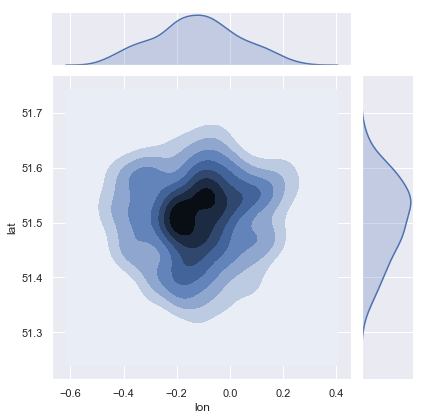

In [531]:
sns.jointplot(rdf['lon'],rdf['lat'], kind = 'kde')
import warnings
warnings.filterwarnings(action='ignore')
plt.show()


In [584]:
rdf.head()

,Ward Name,Ward Code,HECTARES,NONLD_AREA,LB_GSS_CD,Borough Name,POLY_ID,geometry,count,lon,lat
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",1,-0.312006,51.347962
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.6 165447.1, 517837.1 165469.4...",19,-0.289881,51.374267
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.5 167303.4, 518114.3 167307.5...",2,-0.289434,51.392645
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480 166909.8, 520490.7 166901.9, ...",2,-0.275249,51.383885
4,Beverley,E05000402,187.821,0.0,E09000021,Kingston upon Thames,117161,"POLYGON ((522071 168144.9, 522063.9 168144, 52...",15,-0.258915,51.402739


In [585]:
crime5 = crime4.merge(cor, on = ['Ward Name', 'Borough Name'], how = 'left')

In [586]:
#cor.describe()
crime5.shape

(890813, 18)

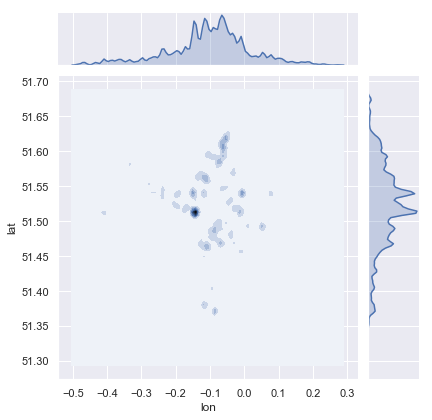

In [597]:
sns.jointplot(crime5['lon'],crime5['lat'], kind = 'kde')
import warnings
warnings.filterwarnings(action='ignore')
plt.show()

In [596]:
import folium
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster, FastMarkerCluster
# Ensure you're handing it floats
crime5['lat'] = crime5['lat'].astype(float)
crime5['lon'] = crime5['lon'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_df = crime5[['lat', 'lon']]
heat_df = heat_df.dropna(axis=0, subset=['lat','lon'])

# List comprehension to make out list of lists
heat_data = [[row['lat'],row['lon']] for index, row in heat_df.iterrows()]

heatmap_map = folium.Map([51.50632, -0.1271448], zoom_start=12)

# Plot it on the map
hm=plugins.HeatMap(heat_data,blur = 43, radius = 22)
heatmap_map.add_child(hm)
# get the map shown below 
# if it is blank for browser reason, please save it as html file
heatmap_map.save('crime3.html')

In [590]:
heatmap_map.save('ins.html')

In [609]:

# Ensure you're handing it floats
ins['lat'] = ins['lat_incident'].astype(float)
ins['lon'] = ins['lon_incident'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_df = ins[['lat', 'lon']]
heat_df = heat_df.dropna(axis=0, subset=['lat','lon'])

# List comprehension to make out list of lists
heat_data = [[row['lat'],row['lon']] for index, row in heat_df.iterrows()]

heatmap_map = folium.Map([51.50632, -0.1271448], zoom_start=12)

# Plot it on the map
hm=plugins.HeatMap(heat_data,blur = 30, radius = 30)
heatmap_map.add_child(hm)
# get the map shown below 
# if it is blank for browser reason, please save it as html file
heatmap_map.save('ins1.html')

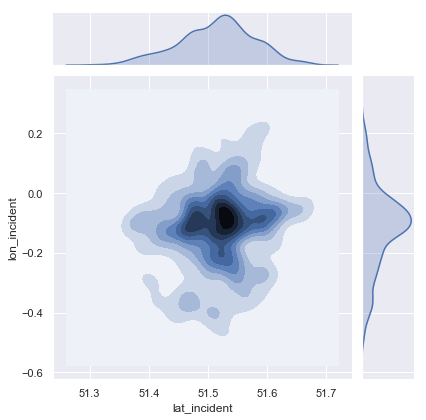

In [561]:
sns.jointplot(ins['lat_incident'],ins['lon_incident'], kind = 'kde')
plt.show()

In [ ]:
from pyproj import Proj, transfrom 

inProj = Proj(init='epsg:27700')
outProj = Proj(init = 'epsg:4326')


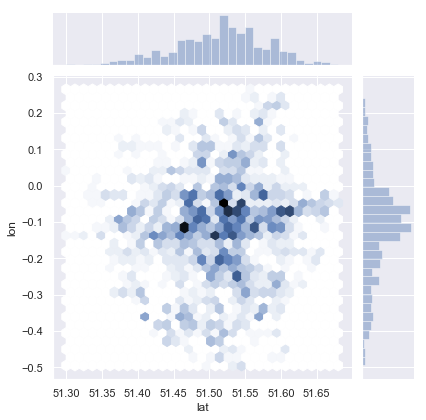

In [565]:
from IPython.core.pylabtools import figsize
#figsize(5,5)
sns.jointplot(ins['lat'],ins['lon'], kind = 'hex')
plt.show()

In [566]:
# 

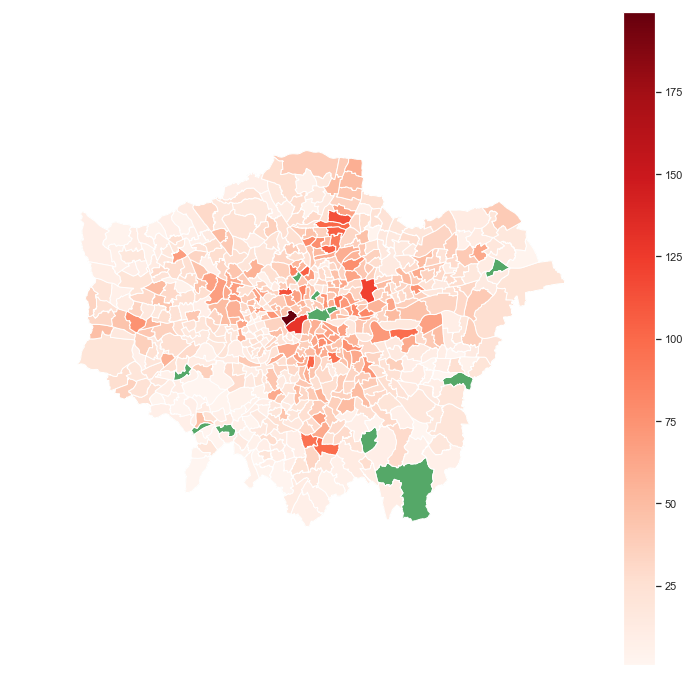

In [432]:
f, ax = plt.subplots(figsize = (12, 12))
ax.set_axis_off()
ward.plot(facecolor = 'g',ax = ax)
rdf.plot(column = 'count', cmap = 'Reds',alpha = 1, ax =ax, legend = True )
plt.show()

In [478]:
rdf.to_file('ward_c.shp')

/anaconda2/envs/gsa2018/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [479]:
ward.crs


{'init': 'epsg:27700'}

In [412]:
rdf.iloc[0,:]

Borough Name                                   Kingston upon Thames
Borough Name_x                                                  NaN
Borough Name_y                                                  NaN
HECTARES                                                    755.173
LB_GSS_CD                                                 E09000021
NONLD_AREA                                                        0
POLY_ID                                                       50840
Ward Code                                                       NaN
Ward Code_x                                               E05000405
Ward Code_y                                              E05000405 
Ward Name                                         Chessington South
Ward Name_x                                                     NaN
Ward Name_y                                                     NaN
count                                                             1
geometry          POLYGON ((516401.6 160201.8, 5

In [396]:
crime4_ward.head(1)

,Ward Name,Ward Code_x,HECTARES,NONLD_AREA,LB_GSS_CD,Borough Name,POLY_ID,geometry,Ward Code_y,count
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",E05000405,1


In [266]:
count = crime4_ward['Ward Code'].value_counts().to_frame()

In [268]:
count.columns = ['count']
count['Ward Code'] = count.index.values

In [270]:
ward_count = ward.merge(count, on = '')

## The Data of M

In [501]:
#m_crime = gpd.read_file(os.path.join('SHP_FILEs','LondonWardKnifeCrime','LondonWard_knifeCrime.shp'))
#m_crime.head()

In [502]:
#rdf[rdf['Ward Code']=='E05000027']

In [519]:
(k_crime[k_crime['Date - Daily Data'] == '2018-04-21'])

,Ward Code,Ward Name,Borough Code,Borough Name,Date - Daily Data,Knife Crime Offs,Knife Crime With Injury Offs,Knife Crime with Injury Pers Robb Offs,Knife Crime Injury Victims 1-24,Knife Crime Injury Victims Not DA 1-24 Gang Flagged,Knife Crime Injury Victims Not DA 1-24,Gun Crime Lethal Barrelled Discharged Offs,Month,Week,Week_d,Mon
110,E05000026,Abbey,KG,Barking and Dagenham,2018-04-21,0,0,0,0,0,0,0,4,Sat,6,4
284,E05000027,Alibon,KG,Barking and Dagenham,2018-04-21,0,0,0,0,0,0,0,4,Sat,6,4
459,E05000028,Becontree,KG,Barking and Dagenham,2018-04-21,0,0,0,0,0,0,0,4,Sat,6,4
630,E05000029,Chadwell Heath,KG,Barking and Dagenham,2018-04-21,0,0,0,0,0,0,0,4,Sat,6,4
802,E05000030,Eastbrook,KG,Barking and Dagenham,2018-04-21,0,0,0,0,0,0,0,4,Sat,6,4
977,E05000031,Eastbury,KG,Barking and Dagenham,2018-04-21,1,1,1,0,0,0,0,4,Sat,6,4
1152,E05000032,Gascoigne,KG,Barking and Dagenham,2018-04-21,0,0,0,0,0,0,0,4,Sat,6,4
1327,E05000033,Goresbrook,KG,Barking and Dagenham,2018-04-21,0,0,0,0,0,0,0,4,Sat,6,4
1499,E05000034,Heath,KG,Barking and Dagenham,2018-04-21,0,0,0,0,0,0,0,4,Sat,6,4
1668,E05000035,Longbridge,KG,Barking and Dagenham,2018-04-21,0,0,0,0,0,0,0,4,Sat,6,4


In [521]:
import numpy as np
a = np.matrix((k_crime[k_crime['Date - Daily Data'] == '2018-06-02']).iloc[:,5])
print(a.sum())



65


In [522]:
(crime4[k_crime['Date - Daily Data'] == '2018-06-02'])['Date - Daily Data'].value_counts()

/anaconda2/envs/gsa2018/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


2018-06-02    84
Name: Date - Daily Data, dtype: int64

## API

In [572]:
api_key  =  '6e61adec4399419abac2feb0cc3f616e'

In [573]:
import requests 
api_url  = "https://newsapi.org/v2/everything/" # base URL
#site_url = "val/wxobs/all/json/sitelist" # sites API URL
payload = {'country' : 'uk',
           'from' : '2018-01-01',
           'to' : '2019-01-01',
           'category' : 'business',
           'q': 'stabbing',
           'apiKey': api_key,
          } # Dictionary to hold request parameters

In [575]:
s = requests.get(api_url , params=payload)

https://newsapi.org/v2/top-headlines?q=trump&apiKey=6e61adec4399419abac2feb0cc3f616e

In [576]:
news = s.json()
print("Done")

Done


In [606]:
ins.head(1)
print(ins.columns)

Index(['Unnamed: 0', 'incidentid', 'callstart', 'age', 'sex', 'lat_incident',
       'lon_incident', 'borough', 'ccgname', 'ccgcluster', 'lsoa', 'wardname',
       'wardID', 'callconcluded', 'T0_T5CallConnectToCallConcluded', 'mps',
       'ht', 'dohcategory', 'chiefcomplaintcode', 'chiefcomplaint',
       'ampdscode', 'description', 'arrivedatscene_aqi', 'response_aqi',
       'vehiclesarrived', 'totalonscenetime', 'totaljobcycletime',
       'alcoholrelated', 'hospitalcode', 'conveyed', 'conveyed_ed',
       'cntd__incidenttype', 'min__incidenttype', 'max__incidenttype',
       'cntd__illnesstype', 'min__illnesstype', 'max__illnesstype', 'Quarter',
       'Hrs', 'Week', 'Mon', 'Year', 'WeekD', 'lat', 'lon'],
      dtype='object')


In [608]:
ins['description'].value_counts()

Central Stab Wounds                                   1261
Not Alert post Stabbing                                319
Serious Haemorrhage - Stabbing                         136
Central self inflicted stab (No priority symptoms)     111
Central Gunshot Wounds                                  84
Central Penetrating Trauma Wounds                       63
Unconscious post Stabbing                               61
Multiple Stab Wounds                                    61
Not Alert/self inflicted stab(No PSympt)                37
Arrest post Stabbing                                    33
Known Single Peripheral Stab Wound                      28
Serious Haemorrhage - Penetrating Trauma                25
Not Alert post Gunshot                                  21
Stabbing Unkn Status/Other codes not applicable         18
Single Peripheral Wound Penetrating Trauma              16
Not Alert post Penetrating Trauma                       14
Single Peripheral Wound Impaled Currently               

In [602]:
#crime4['Date - Daily Data'].value_counts()

In [604]:
ins.sex.value_counts()

M    1998
F     271
U     127
Name: sex, dtype: int64